<a href="https://colab.research.google.com/github/ch3rnoalpha/Sales_predictions---john-paredes/blob/main/Project_core_1_John_paredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project core 2

John paredes

In [2]:
#imports drive and mounts it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#imports pandas as 'pd'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#sets filepath as file name and creates dataframe
filename = '/content/drive/MyDrive/CodingDojo/Data files/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#shows the shape of the dataframe
df.shape

(8523, 12)

In [ ]:
#shows data types
df.dtypes

In [ ]:
#drops duplicates
df.drop_duplicates(subset =["Item_Identifier"], keep ='last', inplace = True)
df

In [ ]:
#shows thats null
df.isnull().sum()

Item_Identifier                0
Item_Weight                  286
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  414
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [ ]:
#fills missing data with mean for integer based colum, then verifys it was filled
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)
print(df.isnull().sum())

In [7]:
#shows unique values for outlet size column
df['Outlet_Size'].unique()

array(['Medium', 'Small', nan, 'High'], dtype=object)

In [ ]:
#fills missing strings with new catagory then verifys data is filled
df['Outlet_Size'].fillna(('unknown'), inplace = True)
print(df.isnull().sum())

In [ ]:
#shows sum of unique values per column
df.nunique()

In [ ]:
#shows datatypes of all comuns
df.dtypes

In [ ]:
#Goes through data. setting all strings to lowercase to get rid of inconsistent categories of data
for col in df.columns:
  if df[col].dtypes == object:
    df[col] = df[col].str.lower()
df

In [ ]:
#prints info on colums that are numerical (float or int)
for col in df.columns:
  if df[col].dtypes == float or  df[col].dtypes == int:
    print(df[col].describe())


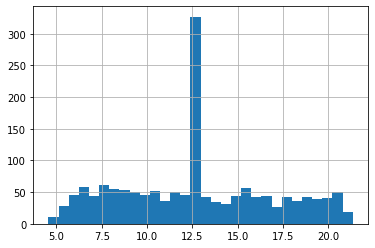

In [14]:
Histogram of item weights
df['Item_Weight'].hist(bins = 30)
plt.ticklabel_format(useOffset=False, style='plain')

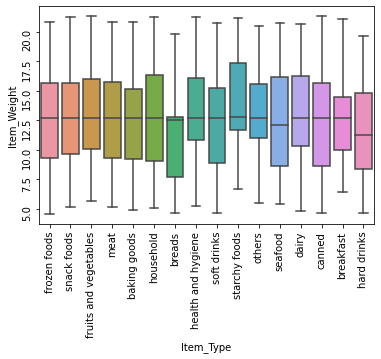

In [20]:
#Bocplot of item type compared to item weight, shows overall averages
ax = sns.boxplot(x='Item_Type', y='Item_Weight', data=df)
ax.tick_params(labelrotation=90)

In [21]:
#creates a correlation chart of all numerical imputs for the df
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.022245,0.028789,0.000147,0.020968
Item_Visibility,-0.022245,1.000000,0.007386,-0.075027,-0.118001
Item_MRP,0.028789,0.007386,1.000000,-0.017667,0.555175
Outlet_Establishment_Year,0.000147,-0.075027,-0.017667,1.000000,-0.036093
Item_Outlet_Sales,0.020968,-0.118001,0.555175,-0.036093,1.000000


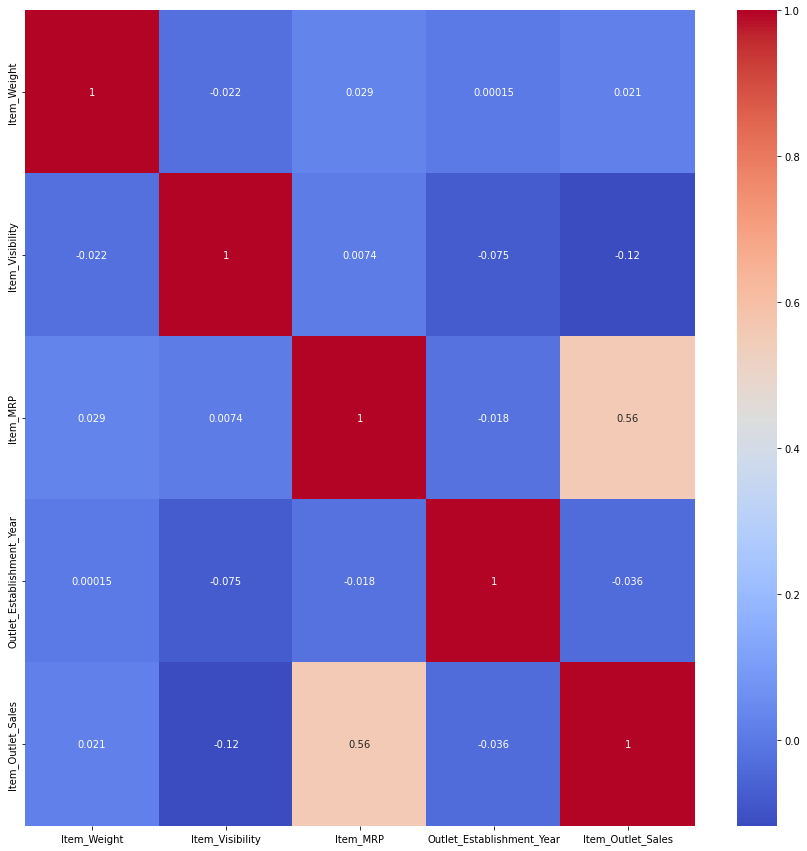

In [22]:
#creates a basic heatmap comparing numerical datapoints, looks for correlations
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm', annot=True)